# Exam Project: The formation of ISIS' Social Media Network
Group members: Zeyu Zhao, Helge Zille, Edith Zink, Sina Smid
# Descriptive Analysis - Words

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

from our_functions import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') # makes the bar charts red on grey background with grid, I think it is nice
default_red = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tdb973\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']


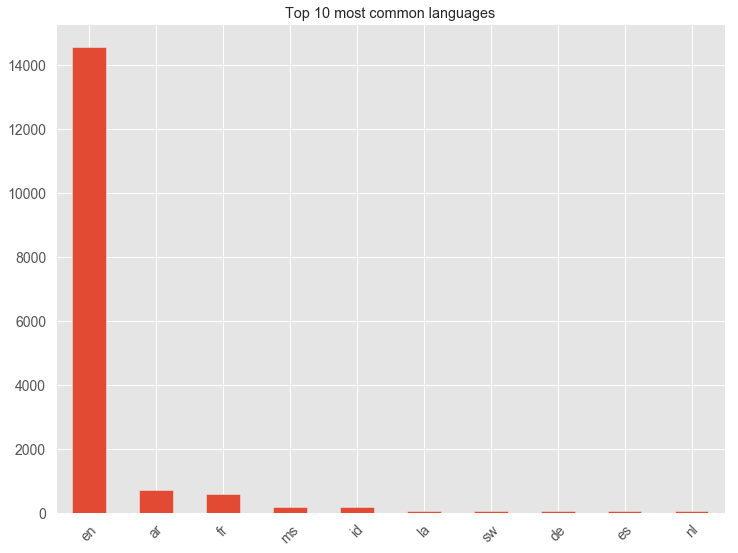

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tdb973\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tdb973\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
%run ./cleaning_18052019.ipynb

In [3]:
list(df)

['index',
 'name',
 'username',
 'description',
 'location',
 'followers',
 'numberstatuses',
 'time',
 'tweets',
 'date',
 'translated',
 'tweets_unedit',
 'retweeted_from',
 'mentions',
 'hashtags',
 'words_in_tweet',
 'tweets_nsw',
 'tweets_stem',
 'tweets_lemm']

In [4]:
all_words = [item for sublist in df.words_in_tweet for item in sublist]
all_words2 = [item for sublist in df.tweets_lemm for item in sublist]

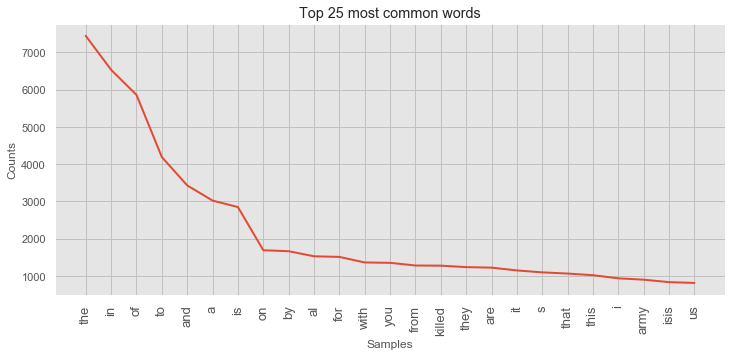

Text(0.5, 1.0, 'log-log plot of words frequency')

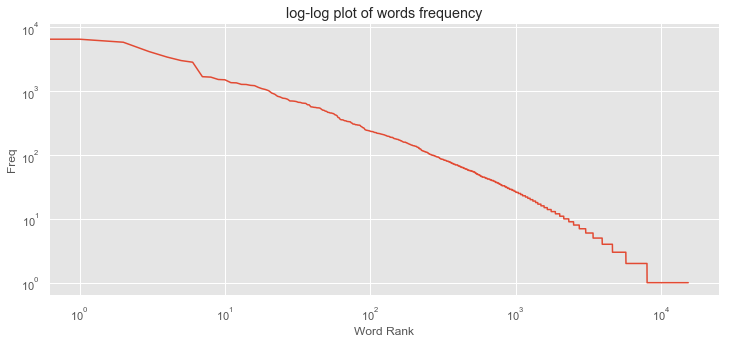

In [5]:
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

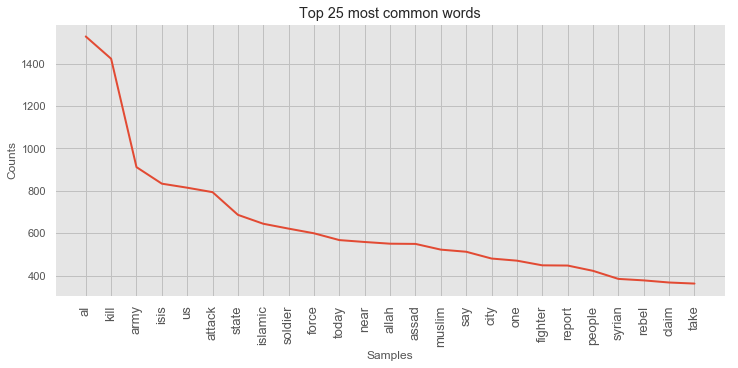

Text(0.5, 1.0, 'log-log plot of words frequency')

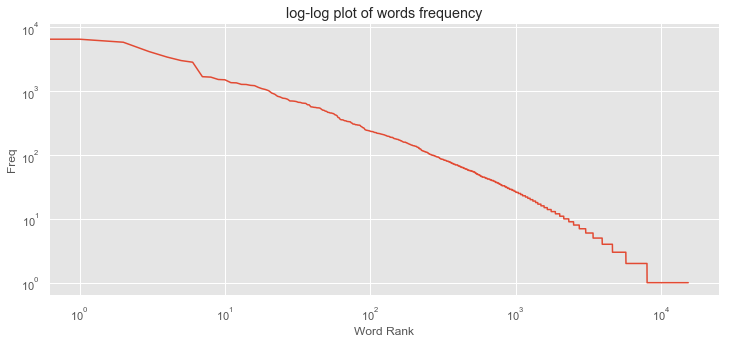

In [6]:
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words2)
fd.plot(25,cumulative=False)
# log-log plot
word_counts2 = sorted(Counter(all_words2).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

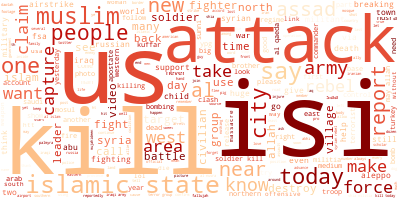

In [17]:
# Wordcloud
from wordcloud import WordCloud
long_string = ','.join(all_words2)
wordcloud = WordCloud(background_color="white", max_words=5000,
                      contour_width=3, contour_color='red', colormap='OrRd')

wordcloud.generate(long_string)
wordcloud.to_image()